## **Analiza podatkov o gorah v slovenskih Alpah**

In [29]:
import pandas as pd

Uvozimo vse tri tabele s podatki o gorah, izhodišča ter vrste (vrh/bivak/koča ...):

In [30]:
julijske_alpe = pd.read_csv('podatki/julijske_alpe/A_julijske_alpe.csv')
karavanke = pd.read_csv('podatki/karavanke/A_karavanke.csv')
kamn_sav_alpe = pd.read_csv('podatki/kamn_sav_alpe/A_kamn_sav_alpe.csv')
izhodisca = pd.read_csv('podatki/izhodisca.csv')
vrsta = pd.read_csv('podatki/vrsta.csv')

Združimo vse tri tabele z gorami v eno samo (priljubljenost je v %, čas pa v minutah). V analizi bomo na vse lokacije gledali kot na vrhove, gore (čeprav so nekatere od njih cerkve, jezera itd.), na koncu pa se bomo res osredotočili le na vrhove.

In [31]:
alpe = pd.concat([julijske_alpe, karavanke, kamn_sav_alpe], ignore_index=True)

In [32]:
alpe

,id,ime,gorovje,visina,priljubljenost,koordinate
0,111,Triglav,Julijske Alpe,2864,100,"46,37832°N 13,83648°E"
1,112,Škrlatica,Julijske Alpe,2740,99,"46,43277°N 13,82114°E"
2,113,Mali Triglav,Julijske Alpe,2725,92,"46,37683°N 13,84315°E"
3,115,Visoki Rokav,Julijske Alpe,2646,91,"46,43547°N 13,8283°E"
4,116,Jalovec,Julijske Alpe,2645,99,"46,42154°N 13,68002°E"
...,...,...,...,...,...,...
1000,332328,Šobčev bajer,Kamniško Savinjske Alpe,426,71,"46,3538°N 14,1509°E"
1001,333113,Turistična kmetija Trnovc,Kamniško Savinjske Alpe,412,19,"46,3035°N 14,2864°E"
1002,331678,Grad Žovnek,Kamniško Savinjske Alpe,409,69,"46,2763°N 15,0041°E"
1003,332827,Šoštanj,Kamniško Savinjske Alpe,358,26,"46,3774°N 15,0485°E"


In [33]:
vrsta

,id,vrsta
0,111,vrh
1,111,bivak
2,112,vrh
3,113,vrh
4,115,vrh
...,...,...
1123,332760,jezero
1124,332328,jezero
1125,333113,koča
1126,331678,vrh


In [34]:
izhodisca

,id,izhodisce,cas,zahtevnost,pot,visinaizhodisca,visinskarazlika
0,111,Aljažev dom v Vratih,360,zelo zahtevna označena pot,Tominškova pot,1015,1849
1,111,Konec ceste na Pokljuki,360,zelo zahtevna označena pot,čez Planiko in Mali Triglav,1340,1524
2,111,Dolina Krma,370,zelo zahtevna označena pot,čez Kredarico,930,1934
3,111,Aljažev dom v Vratih,390,zelo zahtevna označena pot,čez Plemenice,1015,1849
4,111,Aljažev dom v Vratih,370,zelo zahtevna označena pot,čez Prag,1015,1849
...,...,...,...,...,...,...,...
3205,333113,Turistična kmetija Trnovc,180,lahka označena pot,učna pot Kriva jelka,412,0
3206,331678,Žovneško jezero,900,lahka označena pot,NaN,305,104
3207,331678,Žovneško jezero,600,lahka neoznačena steza,po cesti,340,69
3208,332827,Ribiška koča Šoštanj,210,lahka označena pot,Trška pot okoli Šoštanja,358,0


# PRILJUBLJENOST

#### VPRAŠANJE: Ali je višina gore povezana z njeno priljubljenostjo?

Razvrstitev po priljubljenosti (to nam iskreno ne pove veliko):

In [35]:
alpe_po_priljubljenosti = alpe.sort_values("priljubljenost", ascending = False)
alpe_po_priljubljenosti

,id,ime,gorovje,visina,priljubljenost,koordinate
0,111,Triglav,Julijske Alpe,2864,100,"46,37832°N 13,83648°E"
747,3385,Storžič,Kamniško Savinjske Alpe,2132,100,"46,35028°N 14,40472°E"
77,11150,Krn,Julijske Alpe,2244,100,"46,26607°N 13,65862°E"
124,1177,Viševnik,Julijske Alpe,2050,100,"46,35901°N 13,89829°E"
233,11133,Koča pri Triglavskih jezerih,Julijske Alpe,1685,100,"46,3186°N 13,77898°E"
...,...,...,...,...,...,...
696,2113567,Dedni vrh (Šuštarica),Karavanke,653,3,"46,28589°N 15,65327°E"
624,2113605,Kapelica Marijina roka (Stenica),Karavanke,1055,3,"46,36827°N 15,31481°E"
724,2113551,Cerkev Marije Tolažnice (Brezje nad Žetalami),Karavanke,382,3,"46,27183°N 15,7852°E"
718,2113606,Cerkev Marijinega vnebovzetja (Vitanje),Karavanke,472,2,"46,38212°N 15,29745°E"


Ali je priljubljenost gore povezana z njeno višino?

In [36]:
alpe.plot.scatter(x = 'visina', y = 'priljubljenost', title = 'Priljubljenost v odvisnosti od višine')

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

Iz grafa se ne vidi najbolje, mogoče bi bila regresijska črta v obliki nekakšne korenske funkcije?

In [ ]:
((alpe.priljubljenost < 44) & (alpe.priljubljenost > 36)).sum() # s poskušanjem: ne obstaja priljubljenost na intervalu (36, 44)

0

Gore s 100 %-tno priljubljenostjo:

In [ ]:
alpe[alpe.priljubljenost == 100]
# alpe[alpe.priljubljenost == 100].ime.count()

,id,ime,gorovje,visina,priljubljenost,koordinate
0,111,Triglav,Julijske Alpe,2864,100,"46,37832°N 13,83648°E"
77,11150,Krn,Julijske Alpe,2244,100,"46,26607°N 13,65862°E"
124,1177,Viševnik,Julijske Alpe,2050,100,"46,35901°N 13,89829°E"
233,11133,Koča pri Triglavskih jezerih,Julijske Alpe,1685,100,"46,3186°N 13,77898°E"
484,21152,Begunjščica,Karavanke,2060,100,"46,42166°N 14,22982°E"
536,211223,Dom na Kofcah,Karavanke,1488,100,"46,41772°N 14,3232°E"
730,3316,Grintovec,Kamniško Savinjske Alpe,2558,100,"46,35718°N 14,53548°E"
741,33146,Ojstrica,Kamniško Savinjske Alpe,2350,100,"46,36395°N 14,63724°E"
747,3385,Storžič,Kamniško Savinjske Alpe,2132,100,"46,35028°N 14,40472°E"
755,33148,Velika Raduha,Kamniško Savinjske Alpe,2062,100,"46,40991°N 14,73775°E"


# IZHODIŠČA IN POTI

#### HIPOTEZA: Več kot 75 % gora ima več kot eno izhodišče.

Poglejmo si izhodišča. Koliko gora ima več kot eno izhodišče?

In [ ]:
stevilo_poti = izhodisca.id.count() # nekatere poti nimajo imena, ampak se vseeno štejejo za svojo pot
stevilo_poti

3210

In [ ]:
stevilo_poti_za_posamezno_goro = izhodisca.groupby('id').size()
stevilo_poti_za_posamezno_goro

id
111        27
112         5
113         3
115         2
116        10
           ..
2113605     2
2113606     1
2113607     1
2113610     2
2113615     2
Length: 996, dtype: int64

Torej npr. na Triglav vodi 27 poti. Iz koliko izhodišč pa lahko gremo?

In [ ]:
stevilo_razlicnih_izhodisc_dataframe = izhodisca.groupby('izhodisce').size() # dobimo DataFrame z izhodišči in kolikokrat se ponovijo
stevilo_razlicnih_izhodisc = stevilo_razlicnih_izhodisc_dataframe.count()
stevilo_razlicnih_izhodisc
# Jasno je poti več kot izhodišč, saj lahko iz vsakega izhodišča gremo v več smeri, po več poteh na različne lokacije.

548

In [ ]:
stevilo_poti / stevilo_razlicnih_izhodisc # povprečno število poti na izhodišče

5.857664233576642

In [43]:
# napišemo funkcijo, ki za vsak id prešteje število različnih izhodišč te gore
seznam_st_razlicnih_izhodisc = []
for id in alpe.id:
    stevec = 0
    seznam_razlicnih_izhodisc = []
    for izhodisce in izhodisca[izhodisca.id == id].pot: # za vsako izhodišče pogleda, ali se je že ponovilo, sicer prišteje števcu 1
        if izhodisce not in seznam_razlicnih_izhodisc:
            seznam_razlicnih_izhodisc.append(izhodisce)
            stevec += 1
    seznam_st_razlicnih_izhodisc.append(stevec)
razlicna_izhodisca = alpe[['id','ime']].assign(stevilorazlicnihizhodisc = seznam_st_razlicnih_izhodisc) # število različnih izhodišč pripropamo v "alpe"
razlicna_izhodisca

,id,ime,stevilorazlicnihizhodisc
0,111,Triglav,18
1,112,Škrlatica,3
2,113,Mali Triglav,3
3,115,Visoki Rokav,2
4,116,Jalovec,6
...,...,...,...
1000,332328,Šobčev bajer,5
1001,333113,Turistična kmetija Trnovc,1
1002,331678,Grad Žovnek,2
1003,332827,Šoštanj,1


In [ ]:
stevilo_izhodisc_za_posamezno_goro_dataframe = izhodisca.

In [ ]:
stevilo_gora_z_vec_kot_enim_izhodiscem = (razlicna_izhodisca.stevilorazlicnihizhodisc > 1).sum()
stevilo_gora_z_vec_kot_enim_izhodiscem

497

In [ ]:
delez_gora_z_vec_izhodisci = stevilo_gora_z_vec_kot_enim_izhodiscem / alpe.ime.count()
delez_gora_z_vec_izhodisci

0.4945273631840796

Hipoteza *"več kot 75 % gora ima več kot eno izhodišče"* je tako OVRŽENA.

Katere so vse možne zahtevnosti poti?

In [ ]:
izhodisca.groupby('zahtevnost').size()

zahtevnost
alpinistični vzpon                                               9
delno zahtevna neoznačena pot                                   73
delno zahtevna neoznačena pot, delno zahtevna označena pot       4
delno zahtevna neoznačena pot, lahka označena pot                6
delno zahtevna neoznačena pot, lahko brezpotje                   1
delno zahtevna neoznačena pot, zahtevna označena pot             3
delno zahtevna označena pot                                    183
delno zahtevna označena pot, delno zahtevna neoznačena pot       2
delno zahtevna označena pot, lahka neoznačena steza              5
delno zahtevna označena pot, lahko brezpotje                    26
delno zahtevna označena pot, zahtevno brezpotje                  7
delno zahtevna označena pot, zelo zahtevno brezpotje             1
izjemno zahtevna označena pot                                   20
izjemno zahtevna označena pot, lahko brezpotje                   1
lahka neoznačena steza                             

Ker očitno obstajajo poti z več težavnostmi, se zaplete ... Lahko bi definirali še 4. tabelo, ampak je ta vezana na izhodišče, ki je vezano na goro in se zakomplicira.

# VIŠINA IN ČASI POTI

#### HIPOTEZA: Čas poti je povezan z višinsko razliko med izhodiščem in vrhom gore.

Število gora z višino vsaj 2000 m:

In [ ]:
dvatisocaki = alpe[alpe.visina >= 2000]
# dvatisocaki[["ime", "visina"]].sort_values("visina", ascending=False) # --> tabelica s samo stolpcema "ime" in "visina" (padajoče)
dvatisocaki.ime.count()

175

In [ ]:
stevilo_enkratnih_visin = (alpe.groupby('visina').size() == 1).sum() # število višin, torej le po ena gora je tako visoka

Razvrstitev po padajoči višinski razliki med izhodiščem in vrhom:

In [ ]:
alpe_z_izhodisci = pd.merge(alpe, izhodisca, left_on='id', right_on='id') # združeni tabeli 'alpe' in 'izhodisca'

In [ ]:
alpe_z_manj_podatki = alpe_z_izhodisci[['id', 'ime', 'visina', 'izhodisce', 'cas', 'zahtevnost', 'pot', 'visinaizhodisca', 'visinskarazlika']]
alpe_z_padajocimi_visinskimi_razlikami = alpe_z_manj_podatki.sort_values('visinskarazlika', ascending=False)
alpe_z_padajocimi_visinskimi_razlikami

,id,ime,visina,izhodisce,cas,zahtevnost,pot,visinaizhodisca,visinskarazlika
25,111,Triglav,2864,Srednja vas,465,zelo zahtevna označena pot,Za Ribnico in čez Triglavsko škrbino,583,2281
18,111,Triglav,2864,Stara Fužina,465,zelo zahtevna označena pot,čez Planiko in Mali Triglav,600,2264
21,111,Triglav,2864,Stara Fužina,450,zelo zahtevna označena pot,čez Planiko in Triglavsko škrbino,600,2264
19,111,Triglav,2864,Zadnjica,435,zelo zahtevna označena pot,čez Komar,650,2214
14,111,Triglav,2864,Zadnjica,435,zelo zahtevna označena pot,čez Plemenice,650,2214
...,...,...,...,...,...,...,...,...,...
1316,112439,Gogalova lipa,725,Kosmačev preval,1800,lahka označena pot,NaN,847,-122
1055,111899,Planina Zadnji Vogel,1413,Ski hotel Vogel,1800,lahka označena pot,NaN,1540,-127
1835,211498,Ajdna,1046,Valvasorjev dom pod Stolom,2700,lahka označena pot,lahka pot,1181,-135
1839,211498,Ajdna,1046,Valvasorjev dom pod Stolom,2400,zahtevna označena pot,plezalna pot,1181,-135


In [ ]:
stevilo_lokacij_z_visjim_izhodiscem = (alpe_z_izhodisci.visinskarazlika < 0).sum()
stevilo_lokacij_z_visjim_izhodiscem # število lokacij, ki so nižje od izhodišča

43

Kako pa je višinske razlika povezana s časom?

In [ ]:
izhodisca.plot.scatter(x='visinskarazlika', y='cas', title='odvisnost časa od višinske razlike')
# za male višinske razlike gre lahko za dooolge ravninske pohode, zato v naslednjem grafu izločimo višinske razlike < 450 m

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

<AxesSubplot: title={'center': 'odvisnost časa od višinske razlike'}, xlabel='visinskarazlika', ylabel='cas'>

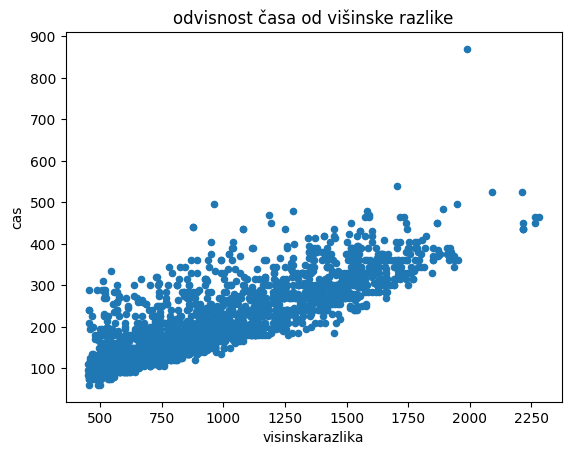

In [ ]:
izhodisca[izhodisca.visinskarazlika > 450].plot.scatter(x='visinskarazlika', y='cas', title='odvisnost časa od višinske razlike')

Izgleda precej linearno, tako da **hipoteza potrjena** ... Zdaj nas zanima tista osamela točka - katera gora ima tako daljšo pot in koliko je dolga?

In [ ]:
alpe_z_izhodisci[(alpe_z_izhodisci.cas > 800) & (alpe_z_izhodisci.cas < 900)]

,id,ime,gorovje,visina,priljubljenost,koordinate,izhodisce,cas,zahtevnost,pot,visinaizhodisca,visinskarazlika
30,112,Škrlatica,Julijske Alpe,2740,99,"46,43277°N 13,82114°E",Gozd Martuljek,870,alpinistični vzpon,grebensko prečenje Mali Oltar-Škrlatica,750,1990


Osebno zanimanje - iz doline Krme smo na Triglav potrebovali 4h in 20 min = 260 min. Koliko časa pa piše na spletni strani, da se potrebuje za to pot?

In [ ]:
alpe_z_izhodisci[(alpe_z_izhodisci.ime == 'Triglav') & (alpe_z_izhodisci.izhodisce == 'Dolina Krma')]

,id,ime,gorovje,visina,priljubljenost,koordinate,izhodisce,cas,zahtevnost,pot,visinaizhodisca,visinskarazlika
2,111,Triglav,Julijske Alpe,2864,100,"46,37832°N 13,83648°E",Dolina Krma,370,zelo zahtevna označena pot,čez Kredarico,930,1934
5,111,Triglav,Julijske Alpe,2864,100,"46,37832°N 13,83648°E",Dolina Krma,360,zelo zahtevna označena pot,čez Planiko in Mali Triglav,930,1934
13,111,Triglav,Julijske Alpe,2864,100,"46,37832°N 13,83648°E",Dolina Krma,345,zelo zahtevna označena pot,čez Planiko in Triglavsko škrbino,930,1934


Mi smo za pot čez Planiko in Triglavsko škrbino potrebovali 260 min, tu pa piše 1h 25 minut več:)

# VRSTE LOKACIJ

#### HIPOTEZA: Vrhov je več kot koč in bivakov skupaj.

Poglejmo, katere vse vrste končnih lokacij imamo in koliko jih je:

In [ ]:
vrsta.groupby('vrsta').size()

vrsta
bivak       49
cerkev      89
jezero      34
koča       146
planina    202
sedlo       30
slap        43
vrh        535
dtype: int64

In [ ]:
stevilo_vrhov = (vrsta['vrsta'] == 'vrh').sum()
stevilo_koc = (vrsta['vrsta'] == 'koča').sum()
stevilo_bivakov = (vrsta['vrsta'] == 'bivak').sum()
stevilo_vrhov > stevilo_koc + stevilo_bivakov

True

Hipoteza *"vrhov je več kot koč in bivakov"* je tako potrjena.

# LOKACIJA

V originalni tabeli so koordinate navedene kot niz. Zdaj jih ločimo na x- in y- koordinate ter jih s plot.scatter prikažemo tudi lokacijsko.

In [46]:
x_koordinate = []
y_koordinate = []
for xy in alpe.koordinate: # xy je oblike "46,37832°N 13,83648°E"
    par_xy = xy.split() # ["46,37832°N", "13,83648°E"]
    x = int(''.join(filter(str.isdigit, par_xy[0]))) # 4637832
    y = int(''.join(filter(str.isdigit, par_xy[1]))) # 1383648
    x_koordinate.append(x/10**(len(str(x))-2)) # doda 46,37832
    y_koordinate.append(y/10**(len(str(y))-2)) # doda 13,83648
locene_koordinate = alpe[['id','ime']].assign(x = x_koordinate, y = y_koordinate)
locene_koordinate

ValueError: invalid literal for int() with base 10: ''

In [47]:
locene_koordinate.plot.scatter(x = 'x', y = 'y', title = 'lokacija vrhov')

NameError: name 'locene_koordinate' is not defined